In [1]:
#import sys
#!{sys.executable} -m pip install --upgrade c-lasso 
from classo import *
import zarr
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

## Data 

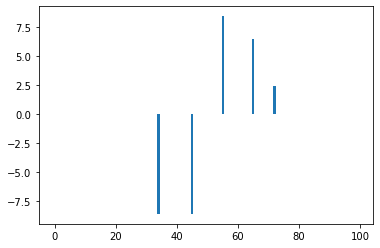

array([34, 45, 55, 65, 72])

In [2]:
m,d,d_nonzero,k,sigma =150,100,5,1,0.5
(X,C,y),sol = random_data(m,d,d_nonzero,k,sigma,zerosum=True,seed=134)
plt.bar(range(len(sol)),sol)
plt.show()

np.arange(len(sol))[sol !=0.]

In [3]:
print("lambdamax = ", max(abs(X.T.dot(y))))

lambdamax =  1426.689321937416


## Problems

In [4]:
problem = classo_problem(X,y,C=C)
problem.model_selection.PATH = True
problem.model_selection.CV = True
problem.model_selection.StabSel = True
problem.model_selection.LAMfixed = True

problem.formulation.w = np.array([2.]*40+ [1.]*(d-40))


problem1 = deepcopy(problem)
problem2 = deepcopy(problem)
problem3 = deepcopy(problem)

problem1.formulation.w = np.array([2.]*40+ [1.]*(d-40))
problem3.formulation.w = np.array([2.]*40+ [1.]*(d-40))


problem1.formulation.intercept = True
problem2.formulation.intercept = True

### Path 

In [5]:
param = problem1.model_selection.PATHparameters
param.numerical_method = ' '
param.n_active = 20
param.lambdas = np.linspace(1.,1e-3,50)

In [6]:
param = problem2.model_selection.PATHparameters
param.numerical_method = 'P-PDS'
param.n_active = 0
param.lambdas = np.linspace(1.,1e-1,50)

In [7]:
param = problem3.model_selection.PATHparameters
param.numerical_method = 'DR'
param.n_active = 0
param.lambdas = np.linspace(1.,1e-1,20)

### Cross validation 

In [8]:
param = problem1.model_selection.CVparameters
param.seed = None
param.numerical_method = ' '
param.Nsubset = 5
param.oneSE = True
param.lambdas = np.linspace(1.,1e-3,80)

In [9]:
param = problem2.model_selection.CVparameters
param.seed = None
param.numerical_method = ' '
param.Nsubset = 7
param.oneSE = False
param.lambdas = np.linspace(1.,1e-3,80)

In [10]:
param = problem3.model_selection.CVparameters
param.seed = 2
param.numerical_method = 'P-PDS'
param.Nsubset = 3
param.oneSE = True
param.lambdas = np.linspace(1.,1e-1,20)

### Stability Selection

In [11]:
param = problem1.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'first'
param.B = 50
param.q = 10
param.percent_nS = 0.5
param.lamin = 0.01
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.7 
param.threshold_label = 0.2

In [12]:
param = problem2.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'max'
param.B = 70
param.q = 20
param.percent_nS = 0.8
param.lamin = 0.01
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.5 
param.threshold_label = 0.2

In [13]:
param = problem3.model_selection.StabSelparameters
param.seed = None
param.numerical_method = ' '
param.method = 'lam'
param.B = 50
param.q = 1000
param.percent_nS = 0.4
param.lamin = 1.
param.hd = False
param.lam = 'theoretical'
param.true_lam = True
param.threshold = 0.8
param.threshold_label = 0.2

### Lambda fixed 

In [14]:
param = problem1.model_selection.LAMfixedparameters
param.numerical_method = 'P-PDS'
param.lam = 'theoretical'
param.true_lam = True

In [15]:
param = problem2.model_selection.LAMfixedparameters
param.numerical_method = 'DR'
param.lam = 0.1
param.true_lam = False

In [16]:
param = problem3.model_selection.LAMfixedparameters
param.numerical_method = ' '
param.lam = 0.
param.true_lam = True

## R1

In [17]:
problem1.formulation.concomitant = False
problem1.formulation.huber = False
problem1.formulation.classification = False

problem2.formulation.concomitant = False
problem2.formulation.huber = False
problem2.formulation.classification = False

problem3.formulation.concomitant = False
problem3.formulation.huber = False
problem3.formulation.classification = False

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = P-PDS
     rescaled lam : True
     threshold = 0.251
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



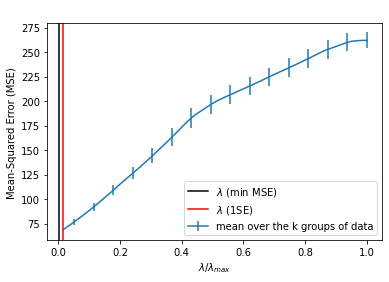

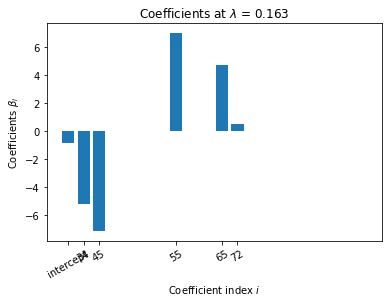

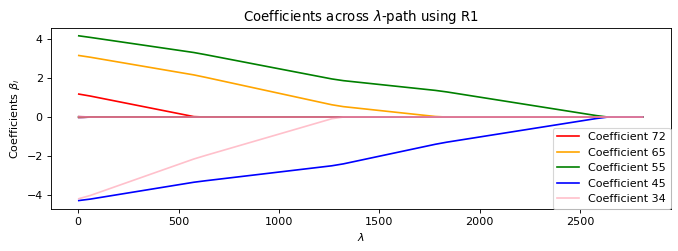

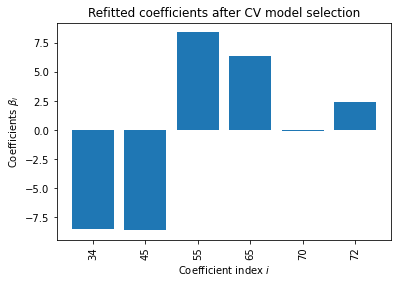

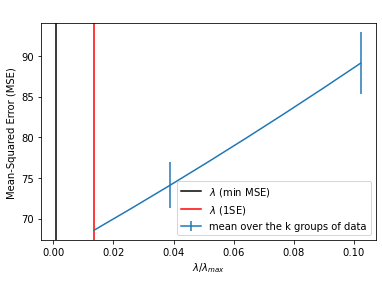

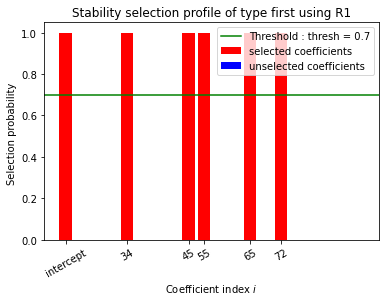

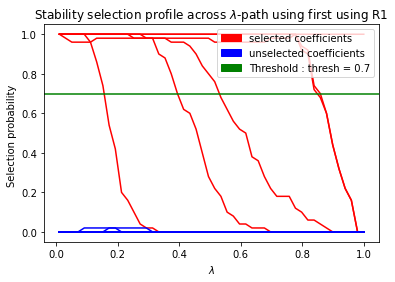

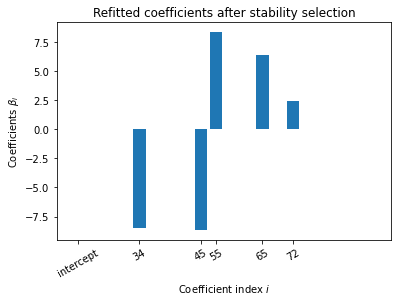


 LAMBDA FIXED : 
   Selected variables :  intercept    34    45    55    65    72    
   Running time :  0.008s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.027s

 CROSS VALIDATION : 
 Intercept : 0.05182582156954263
   Selected variables :  34    45    55    65    70    72    
   Running time :  0.36s

 STABILITY SELECTION : 
   Selected variables :  intercept    3    7    8    11    13    
   Running time :  0.522s

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = DR
     rescaled lam : True
     threshold = 0.286
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : P-PDS
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numeri

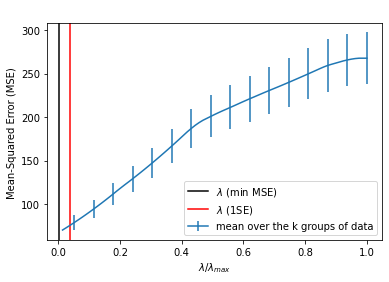

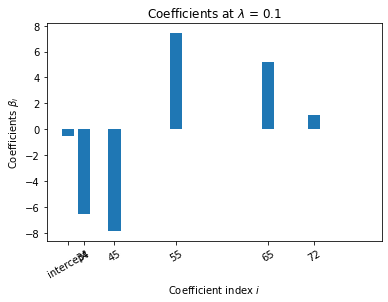

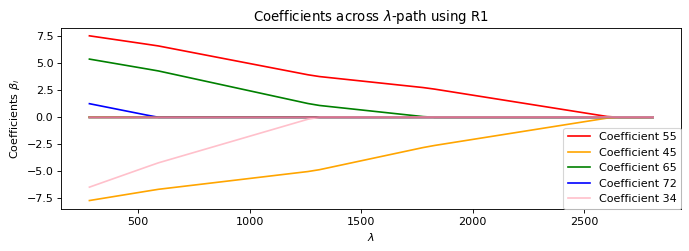

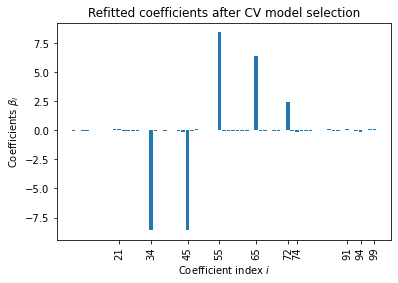

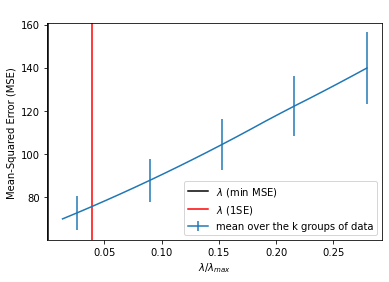

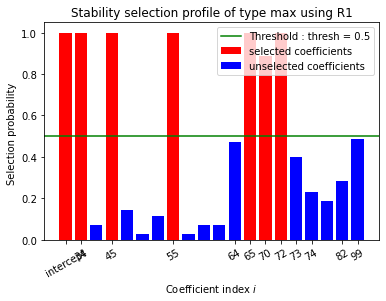

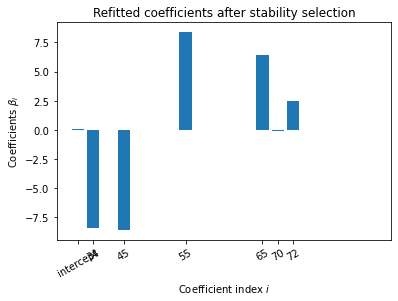


 LAMBDA FIXED : 
   Selected variables :  intercept    34    45    55    65    72    
   Running time :  0.044s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.191s

 CROSS VALIDATION : 
 Intercept : 0.08567229736361437
   Selected variables :  2    6    7    8    11    13    14    15    17    19    21    22    24    27    29    31    32    34    35    37    39    40    42    43    44    45    48    49    51    52    53    54    55    57    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    82    85    86    90    91    92    93    94    96    97    99    
   Running time :  0.473s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    2    6    11    12    13    
   Running time :  0.681s

 
 
FORMULATION: R1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = DR

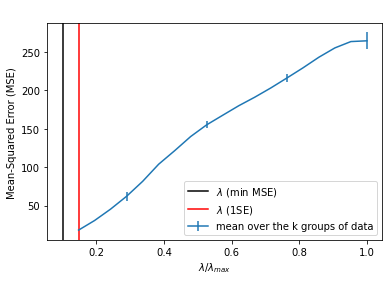

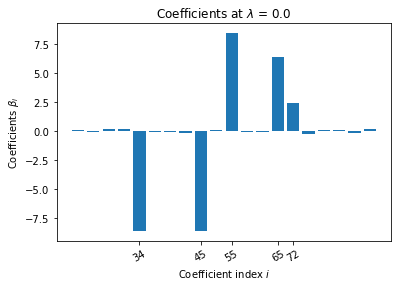

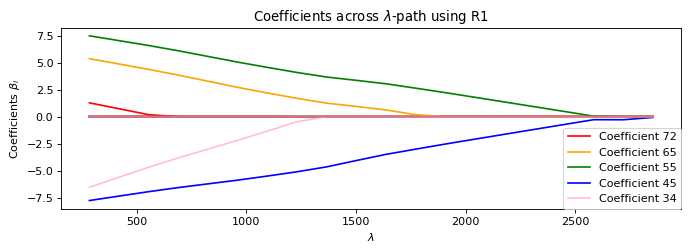

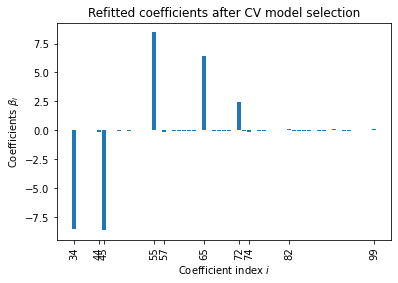

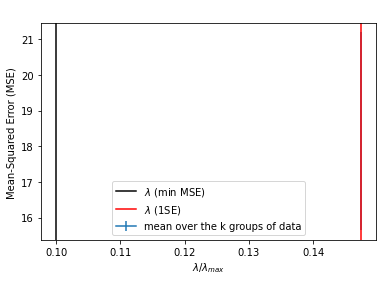

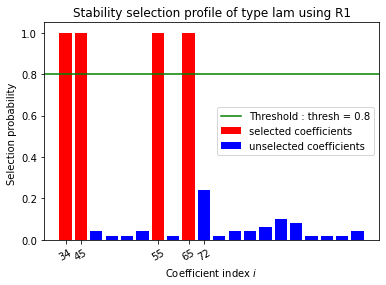

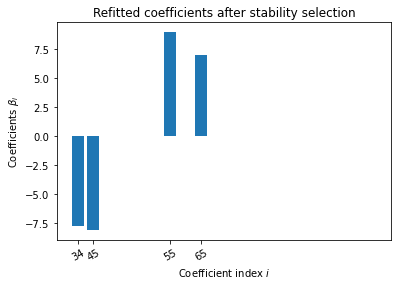


 LAMBDA FIXED : 
   Selected variables :  34    45    55    65    72    
   Running time :  0.001s

 PATH COMPUTATION : 
   Running time :  0.423s

 CROSS VALIDATION : 
   Selected variables :  34    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    58    59    60    61    62    63    64    65    66    67    68    69    70    71    72    73    74    75    76    77    78    79    80    81    82    83    84    85    86    87    88    89    90    91    92    93    94    95    96    97    98    99    
   Running time :  0.284s

 STABILITY SELECTION : 
   Selected variables :  0    1    6    8    
   Running time :  0.194s



In [18]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = None)
print(problem1.solution)

problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = None)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = None)
print(problem3.solution)


## Reset the numerical methods 

In [19]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

problem1.formulation.intercept = False
problem2.formulation.intercept = False
problem3.formulation.intercept = False

## R2

In [20]:
problem1.formulation.concomitant = False
problem1.formulation.huber = True
problem1.formulation.classification = False

problem2.formulation.concomitant = False
problem2.formulation.huber = True
problem2.formulation.classification = False

problem3.formulation.concomitant = False
problem3.formulation.huber = True
problem3.formulation.classification = False

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = P-PDS
     rescaled lam : True
     threshold = 0.251
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



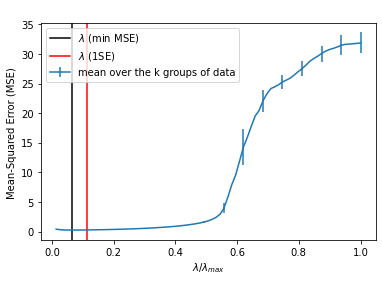

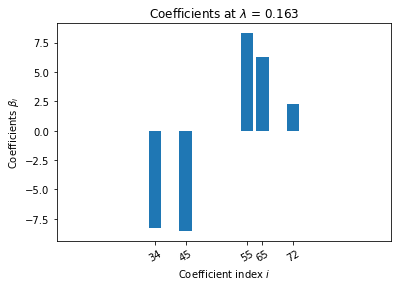

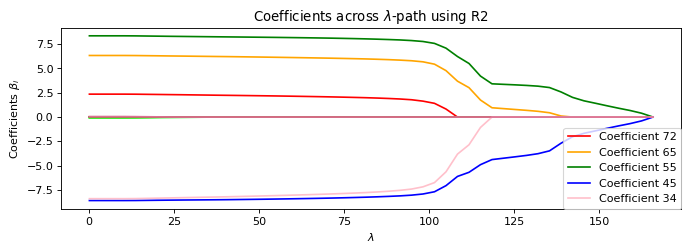

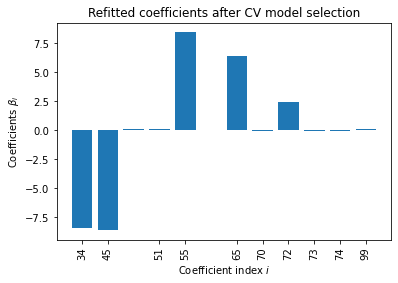

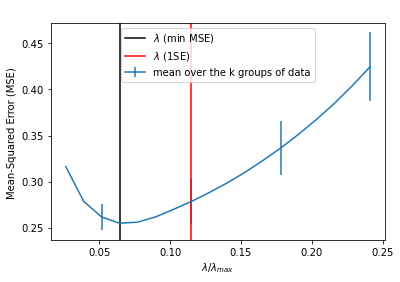

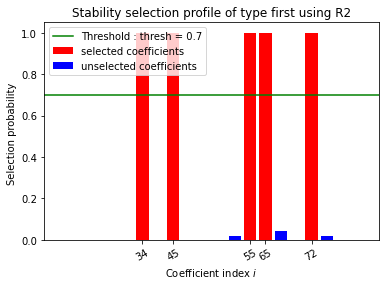

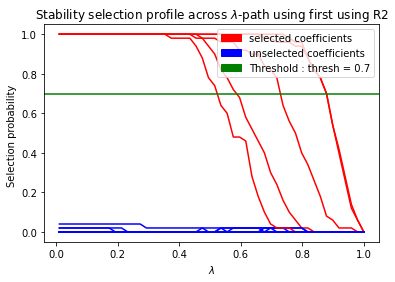

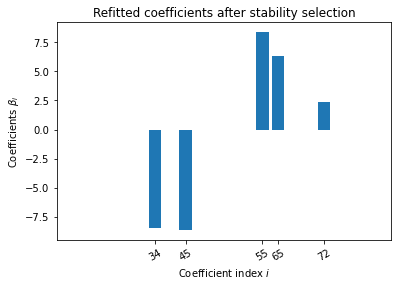


 LAMBDA FIXED : 
   Selected variables :  34    45    55    65    72    
   Running time :  0.034s

 PATH COMPUTATION : 
   Running time :  0.4s

 CROSS VALIDATION : 
   Selected variables :  34    45    49    51    55    64    65    70    72    73    74    99    
   Running time :  2.753s

 STABILITY SELECTION : 
   Selected variables :  5    7    12    13    16    
   Running time :  6.374s

too many labels, there for the labels ['0'] have been deleted
 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = DR
     rescaled lam : True
     threshold = 0.286
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : P-PDS
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
   

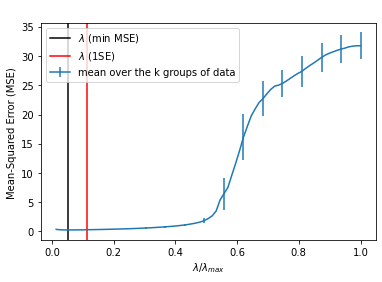

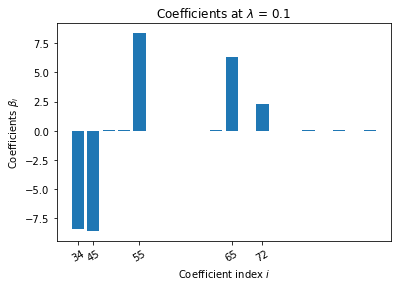

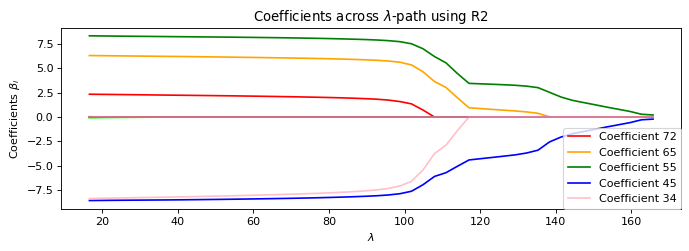

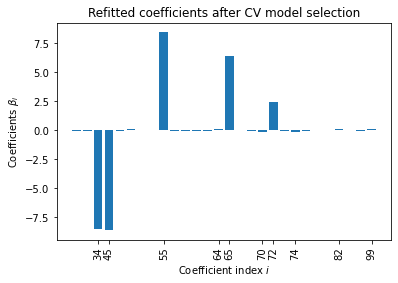

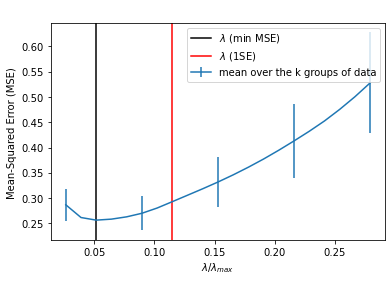

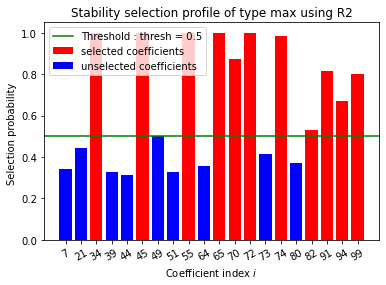

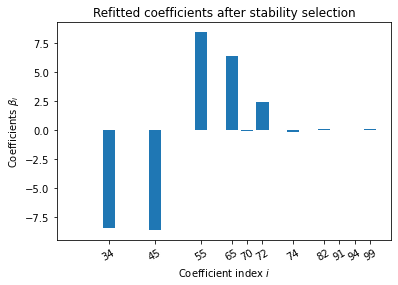


 LAMBDA FIXED : 
   Selected variables :  34    45    55    65    72    
   Running time :  0.109s

 PATH COMPUTATION : 
   Running time :  4.832s

 CROSS VALIDATION : 
   Selected variables :  27    29    34    45    48    49    51    54    55    57    59    61    63    64    65    68    69    70    72    73    74    77    78    80    82    91    94    99    
   Running time :  3.842s

 STABILITY SELECTION : 
   Selected variables :  2    5    8    10    11    12    14    16    17    18    19    
   Running time :  25.963s

 
 
FORMULATION: R2
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.4
     lam = 0.0
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : DR
     lamin = 0.1
     Nlam = 20
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : P-PDS
     one-SE method : True
     Nsubset = 3
     

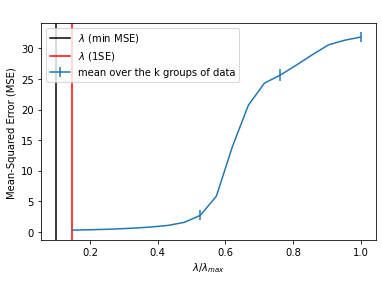

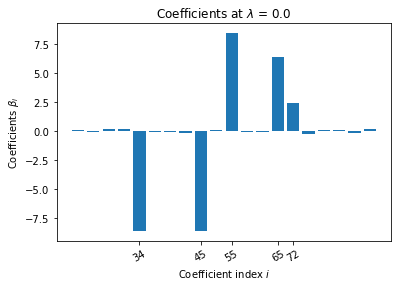

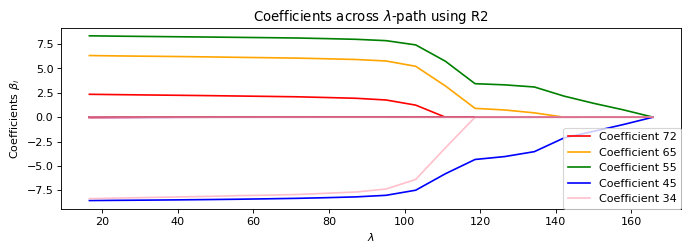

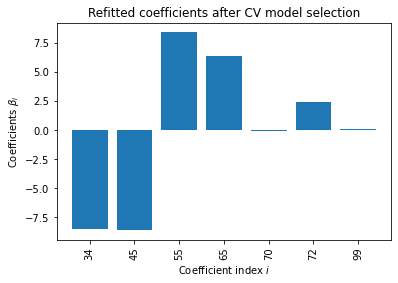

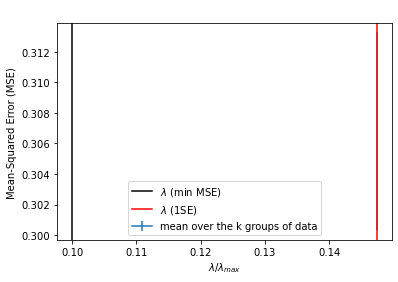

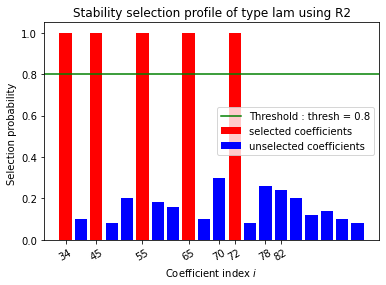

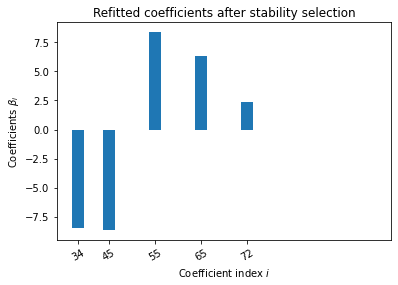


 LAMBDA FIXED : 
   Selected variables :  34    45    55    65    72    
   Running time :  0.012s

 PATH COMPUTATION : 
   Running time :  5.79s

 CROSS VALIDATION : 
   Selected variables :  34    45    55    65    70    72    99    
   Running time :  3.727s

 STABILITY SELECTION : 
   Selected variables :  0    2    5    8    11    
   Running time :  4.563s



In [21]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = None)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = None)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = None)
print(problem3.solution)


## Reset the numerical methods 

In [22]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'


problem1.formulation.e = ' '
problem2.formulation.e = ' '
problem3.formulation.e = ' '

problem1.formulation.intercept = True
problem2.formulation.intercept = True
problem3.formulation.intercept = False

## R3

In [23]:
problem1.formulation.concomitant = True
problem1.formulation.huber = False
problem1.formulation.classification = False

problem2.formulation.concomitant = True
problem2.formulation.huber = False
problem2.formulation.classification = False

problem3.formulation.concomitant = True
problem3.formulation.huber = False
problem3.formulation.classification = False

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.251
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



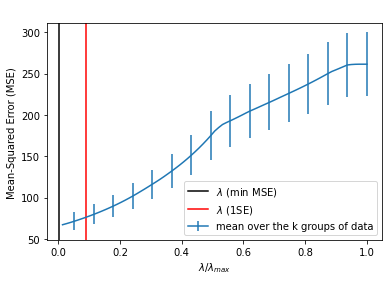

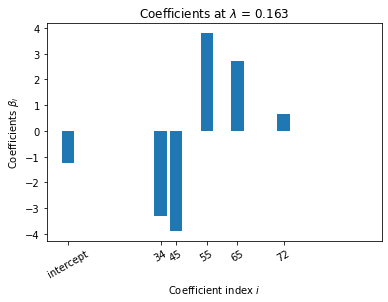

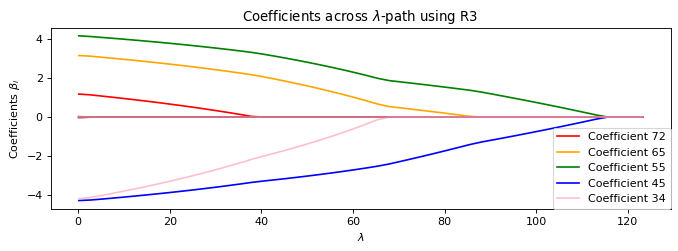

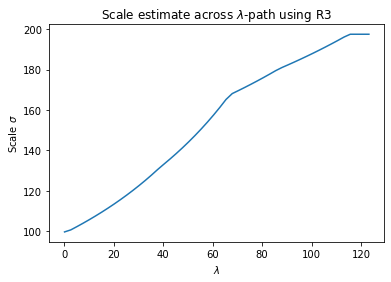

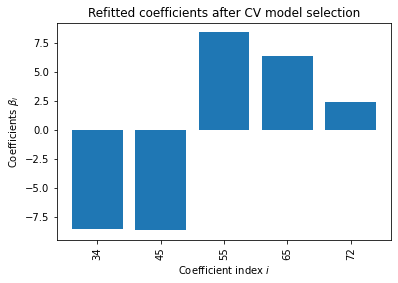

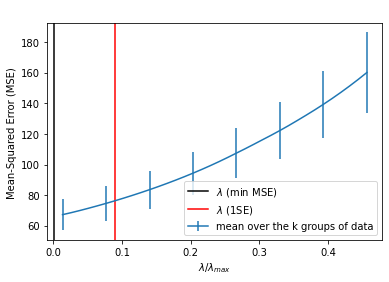

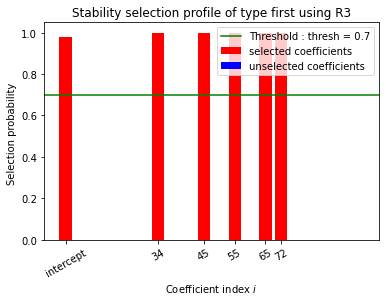

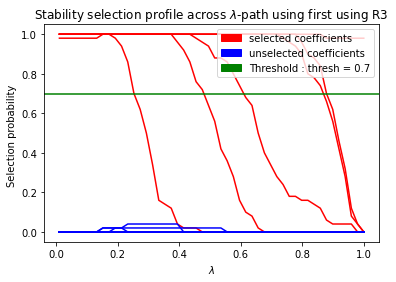

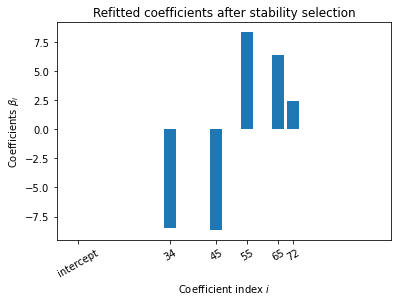


 LAMBDA FIXED : 
   Sigma  =  1.51
   Selected variables :  intercept    34    45    55    65    72    
   Running time :  0.005s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.038s

 CROSS VALIDATION : 
 Intercept : 0.05369727078426101
   Selected variables :  34    45    55    65    72    
   Running time :  0.384s

 STABILITY SELECTION : 
   Selected variables :  intercept    5    8    10    12    13    
   Running time :  0.693s

 
 
FORMULATION: R3
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = DR
     rescaled lam : True
     threshold = 0.286
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMET

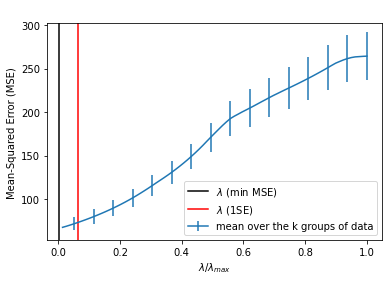

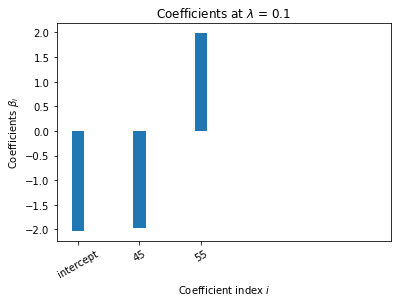

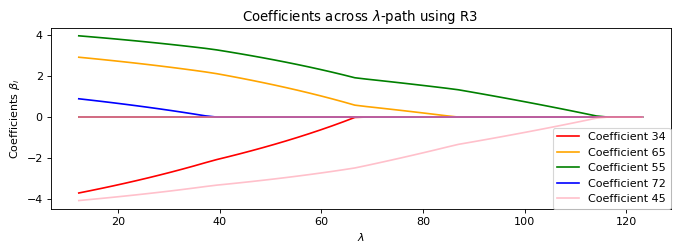

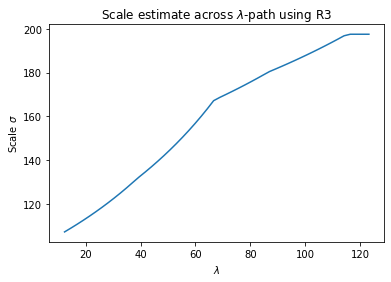

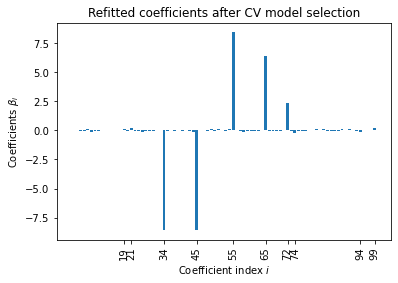

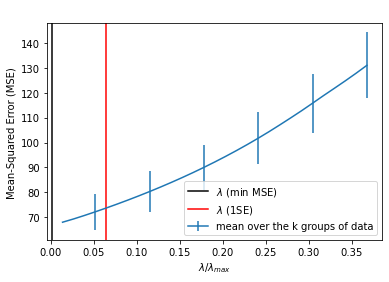

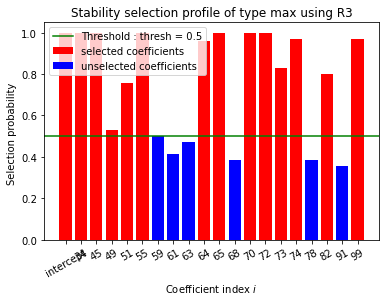

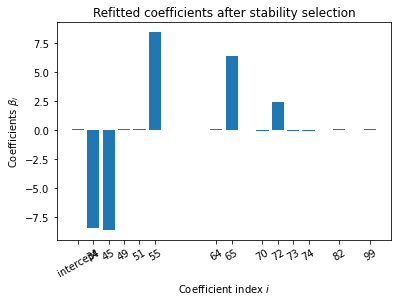


 LAMBDA FIXED : 
   Sigma  =  21.103
   Selected variables :  intercept    45    55    
   Running time :  2.564s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.014s

 CROSS VALIDATION : 
 Intercept : 0.07650433700152326
   Selected variables :  0    1    2    5    6    7    8    11    12    13    14    15    16    17    19    20    21    22    23    24    27    28    29    31    32    34    35    37    39    40    41    42    43    44    45    46    47    48    49    50    51    52    53    54    55    56    57    59    60    61    62    63    64    65    66    67    69    70    71    72    73    74    75    76    77    78    79    80    81    82    83    84    85    86    87    90    91    92    93    94    95    96    97    99    
   Running time :  0.567s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    1    2    3    4    8    9    11    12    13    14    16    18    
   Running time :  1.357s

 
 
FORMULATION: R3
 
MODEL SELECTION CO

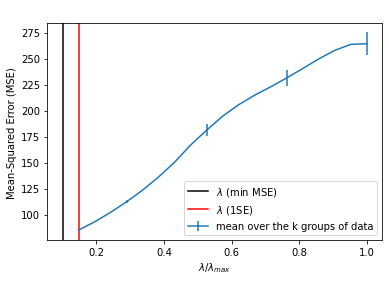

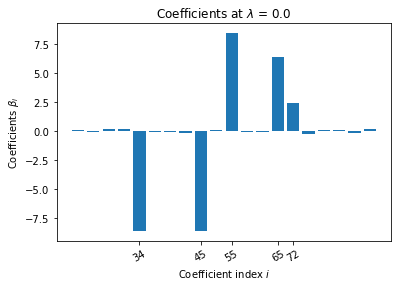

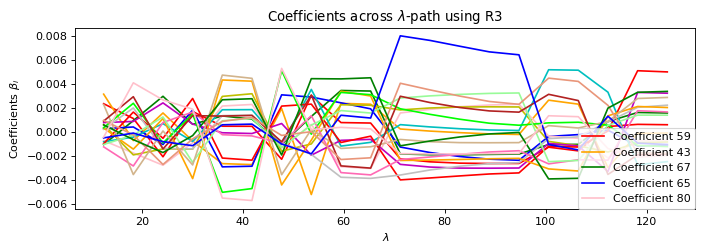

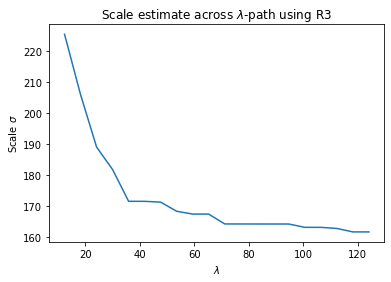

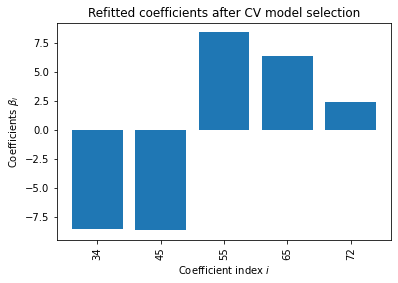

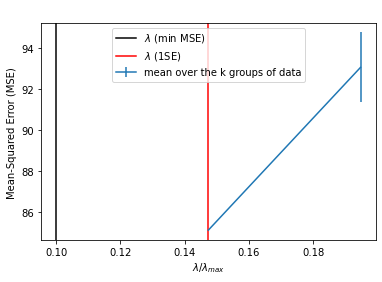

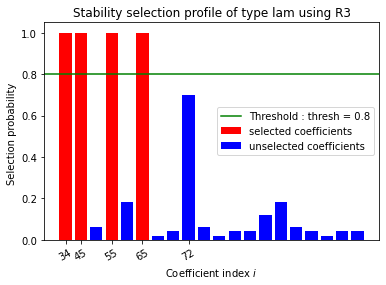

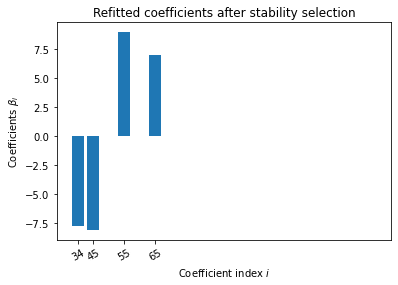


 LAMBDA FIXED : 
   Sigma  =  0.044
   Selected variables :  34    45    55    65    72    
   Running time :  0.001s

 PATH COMPUTATION : 
   Running time :  13.702s

 CROSS VALIDATION : 
   Selected variables :  34    45    55    65    72    
   Running time :  0.03s

 STABILITY SELECTION : 
   Selected variables :  0    1    3    5    
   Running time :  0.306s



In [24]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = None)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = None)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = None)
print(problem3.solution)


## Reset the numerical methods 

In [25]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

problem1.formulation.e = ' '
problem2.formulation.e = ' '
problem3.formulation.e = ' '

problem1.formulation.intercept = False
problem2.formulation.intercept = False
problem3.formulation.intercept = False

## R4

In [ ]:
problem1.formulation.concomitant = True
problem1.formulation.huber = True
problem1.formulation.classification = False

problem2.formulation.concomitant = True
problem2.formulation.huber = True
problem2.formulation.classification = False

problem3.formulation.concomitant = True
problem3.formulation.huber = True
problem3.formulation.classification = False

In [ ]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = 10.)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = 10.)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = 10.)
print(problem3.solution)


## Reset the numerical methods 

In [17]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'


problem1.formulation.intercept = True
problem2.formulation.intercept = True
problem3.formulation.intercept = False

## C1

In [18]:
problem1.formulation.concomitant = False
problem1.formulation.huber = False
problem1.formulation.classification = True
problem1.data.y = np.sign(problem1.data.y)

problem2.formulation.concomitant = False
problem2.formulation.huber = False
problem2.formulation.classification = True
problem2.data.y = np.sign(problem2.data.y)

problem3.formulation.concomitant = False
problem3.formulation.huber = False
problem3.formulation.classification = True
problem3.data.y = np.sign(problem3.data.y)

 
 
FORMULATION: C1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.007
     lam : theoretical
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.001
     Nlam = 50
 
     maximum active variables = 20
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 5
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : first
     B = 50
     q = 10
     percent_nS = 0.5
     threshold = 0.7
     lamin = 0.01
     Nlam = 50



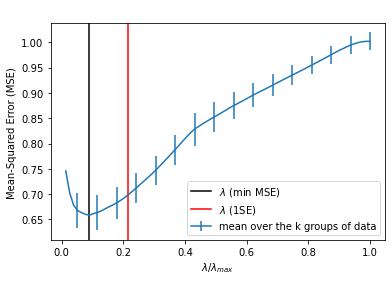

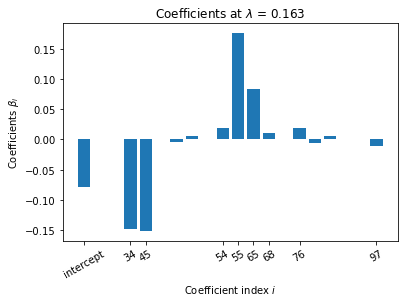

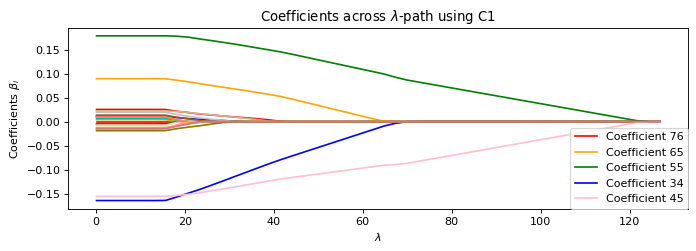

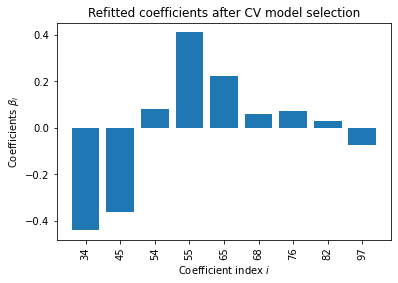

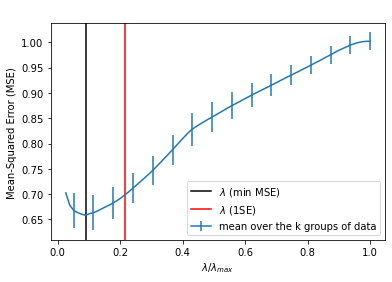

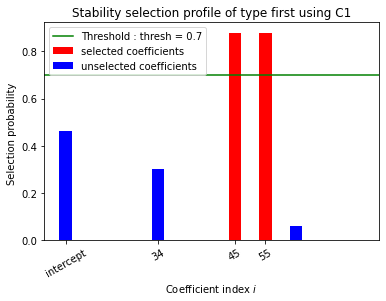

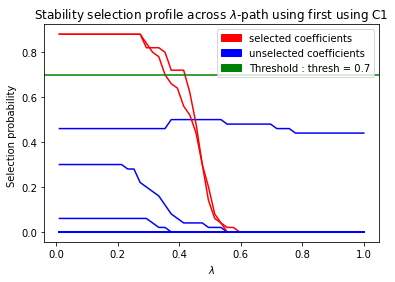

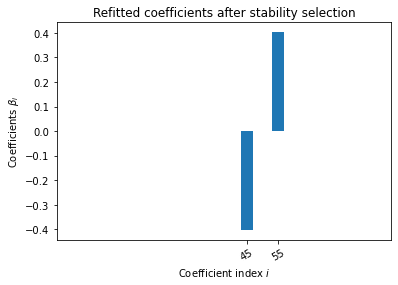


 LAMBDA FIXED : 
   Selected variables :  intercept    34    45    54    55    65    68    76    97    
   Running time :  0.028s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.042s

 CROSS VALIDATION : 
 Intercept : -0.03391045756761838
   Selected variables :  34    45    54    55    65    68    76    82    97    
   Running time :  1.276s

 STABILITY SELECTION : 
   Selected variables :  10    12    
   Running time :  0.824s

 
 
FORMULATION: C1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.01
     lam = 0.1
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 50
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : False
     Nsubset = 7
     lamin = 0.001
     Nlam = 80
 
 
STABILITY SELECTION PARAME

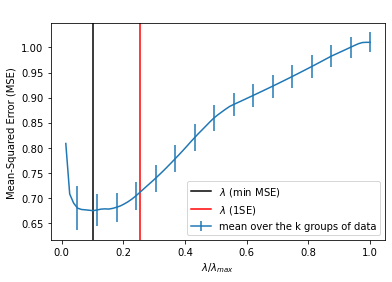

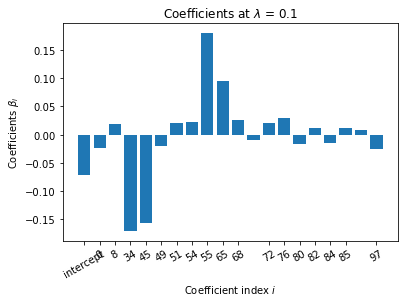

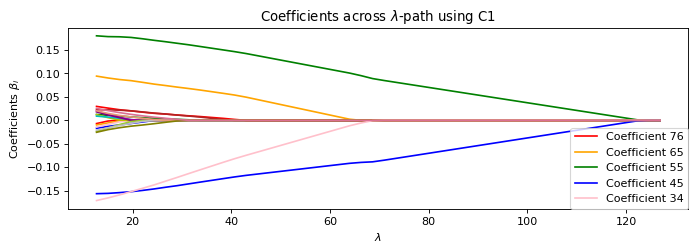

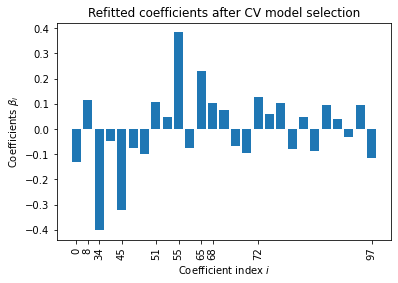

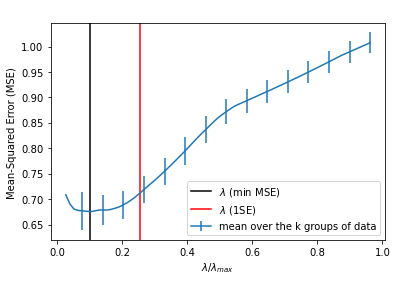

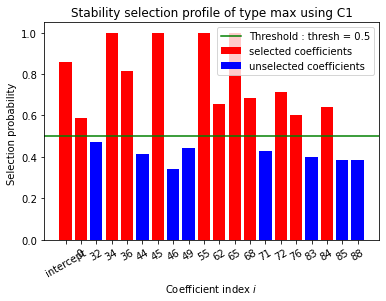

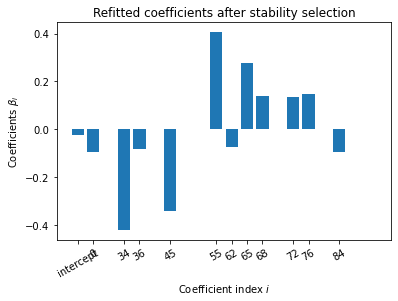


 LAMBDA FIXED : 
   Selected variables :  intercept    0    8    34    45    49    51    54    55    65    68    72    76    80    82    84    85    97    
   Running time :  0.053s

 PATH COMPUTATION : 
 There is also an intercept.  
   Running time :  0.049s

 CROSS VALIDATION : 
 Intercept : -0.028366930990845755
   Selected variables :  0    8    34    44    45    46    49    51    54    55    61    65    68    69    70    71    72    73    76    80    82    84    85    86    92    93    97    
   Running time :  1.411s

 STABILITY SELECTION : 
   Selected variables :  intercept    0    2    3    5    8    9    10    11    13    14    16    
   Running time :  11.434s



/Users/lsimpson/Desktop/GitHub/c-lasso/classoCHANGE/path_alg.py:550: RuntimeWarning: divide by zero encountered in double_scalars
  s = lam_s_dot + lam / (lam - dlamb) * (s - lam_s_dot)
/Users/lsimpson/Desktop/GitHub/c-lasso/classoCHANGE/path_alg.py:550: RuntimeWarning: invalid value encountered in multiply
  s = lam_s_dot + lam / (lam - dlamb) * (s - lam_s_dot)


 
 
FORMULATION: C1
 
MODEL SELECTION COMPUTED:  
     Lambda fixed
     Path
     Cross Validation
     Stability selection
 
LAMBDA FIXED PARAMETERS: 
     numerical_method = Path-Alg
     rescaled lam : True
     threshold = 0.042
     lam = 0.0
     theoretical_lam = 0.1628
 
PATH PARAMETERS: 
     numerical_method : Path-Alg
     lamin = 0.1
     Nlam = 20
 
 
CROSS VALIDATION PARAMETERS: 
     numerical_method : Path-Alg
     one-SE method : True
     Nsubset = 3
     lamin = 0.1
     Nlam = 20
 
 
STABILITY SELECTION PARAMETERS: 
     numerical_method : Path-Alg
     method : lam
     B = 50
     q = 1000
     percent_nS = 0.4
     threshold = 0.8
     lam = theoretical
     theoretical_lam = 0.2574



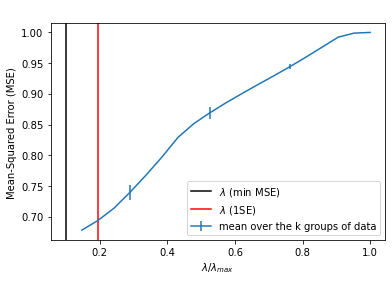

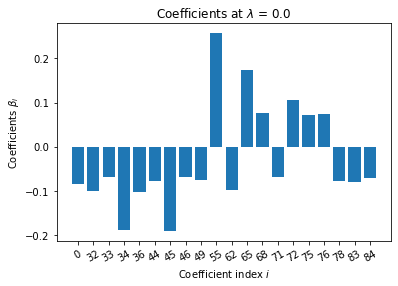

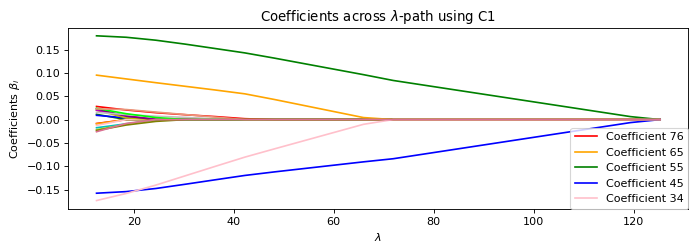

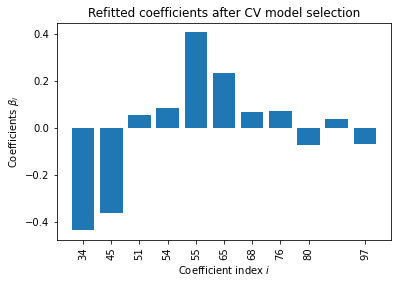

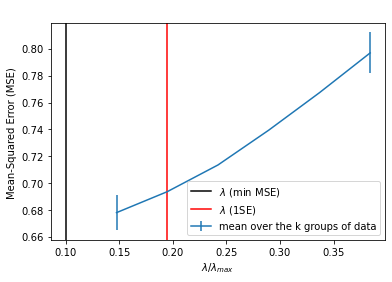

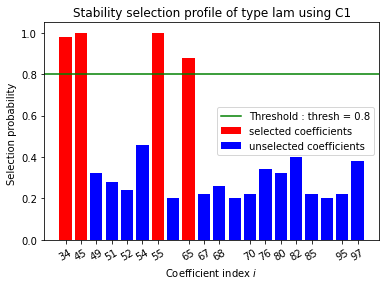

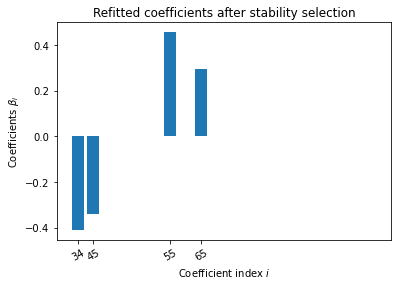


 LAMBDA FIXED : 
   Selected variables :  0    3    7    16    17    30    32    33    34    35    36    41    44    45    46    49    51    55    58    62    63    64    65    68    71    72    74    75    76    78    82    83    84    85    88    99    
   Running time :  0.207s

 PATH COMPUTATION : 
   Running time :  0.057s

 CROSS VALIDATION : 
   Selected variables :  34    45    51    54    55    65    68    76    80    82    97    
   Running time :  0.168s

 STABILITY SELECTION : 
   Selected variables :  0    1    6    8    
   Running time :  0.854s



In [19]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = None)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = None)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = None)
print(problem3.solution)


## Reset the numerical methods 

In [20]:
problem1.model_selection.PATHparameters.numerical_method = ' '
problem2.model_selection.PATHparameters.numerical_method = 'P-PDS'
problem3.model_selection.PATHparameters.numerical_method = 'DR'

problem1.model_selection.CVparameters.numerical_method = ' '
problem2.model_selection.CVparameters.numerical_method = ' '
problem3.model_selection.CVparameters.numerical_method = 'P-PDS' 

problem1.model_selection.StabSelparameters.numerical_method = ' '
problem2.model_selection.StabSelparameters.numerical_method = ' '
problem3.model_selection.StabSelparameters.numerical_method = ' '

problem3.model_selection.StabSelparameters.lam = 'theoretical'

problem1.model_selection.LAMfixedparameters.numerical_method = 'P-PDS'
problem2.model_selection.LAMfixedparameters.numerical_method = 'DR'
problem3.model_selection.LAMfixedparameters.numerical_method = 'Path-Alg'

problem1.model_selection.LAMfixedparameters.lam = 'theoretical'

## C2

In [21]:
problem1.formulation.concomitant = False
problem1.formulation.huber = True
problem1.formulation.classification = True

problem2.formulation.concomitant = False
problem2.formulation.huber = True
problem2.formulation.classification = True

problem3.formulation.concomitant = False
problem3.formulation.huber = True
problem3.formulation.classification = True

In [22]:
problem1.solve()
print(problem1)
problem1.solution.CV.graphic(se_max = None)
print(problem1.solution)


problem2.solve()
print(problem2)
problem2.solution.CV.graphic(se_max = None)
print(problem2.solution)


problem3.solve()
print(problem3)
problem3.solution.CV.graphic(se_max = None)
print(problem3.solution)

too many labels, there for the labels ['0'] have been deleted


ValueError: The classo package does not perform huber classification with an intercept